In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
tp=pd.read_csv('temperature.csv')
tp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
tp.shape

(7752, 25)

In [4]:
tp.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [5]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
tp['Date']=imp.fit_transform(tp['Date'].values.reshape(-1,1))

In [7]:
tp.isnull().sum()

station              2
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
tp['station']=tp['station'].replace(np.nan,tp['station'].mean())
tp['Present_Tmax']=tp['Present_Tmax'].replace(np.nan,tp['Present_Tmax'].mean())
tp['Present_Tmin']=tp['Present_Tmin'].replace(np.nan,tp['Present_Tmin'].mean())
tp['LDAPS_RHmin']=tp['LDAPS_RHmin'].replace(np.nan,tp['LDAPS_RHmin'].mean())
tp['LDAPS_RHmax']=tp['LDAPS_RHmax'].replace(np.nan,tp['LDAPS_RHmax'].mean())
tp['LDAPS_Tmax_lapse']=tp['LDAPS_Tmax_lapse'].replace(np.nan,tp['LDAPS_Tmax_lapse'].mean())
tp['LDAPS_Tmin_lapse']=tp['LDAPS_Tmin_lapse'].replace(np.nan,tp['LDAPS_Tmin_lapse'].mean())
tp['LDAPS_WS']=tp['LDAPS_WS'].replace(np.nan,tp['LDAPS_WS'].mean())
tp['LDAPS_LH']=tp['LDAPS_LH'].replace(np.nan,tp['LDAPS_LH'].mean())
tp['LDAPS_CC1']=tp['LDAPS_CC1'].replace(np.nan,tp['LDAPS_CC1'].mean())
tp['LDAPS_CC2']=tp['LDAPS_CC2'].replace(np.nan,tp['LDAPS_CC2'].mean())
tp['LDAPS_CC3']=tp['LDAPS_CC3'].replace(np.nan,tp['LDAPS_CC3'].mean())
tp['LDAPS_CC4']=tp['LDAPS_CC4'].replace(np.nan,tp['LDAPS_CC4'].mean())
tp['LDAPS_PPT1']=tp['LDAPS_PPT1'].replace(np.nan,tp['LDAPS_PPT1'].mean())
tp['LDAPS_PPT2']=tp['LDAPS_PPT2'].replace(np.nan,tp['LDAPS_PPT2'].mean())
tp['LDAPS_PPT3']=tp['LDAPS_PPT3'].replace(np.nan,tp['LDAPS_PPT3'].mean())
tp['LDAPS_PPT4']=tp['LDAPS_PPT4'].replace(np.nan,tp['LDAPS_PPT4'].mean())
tp['Next_Tmax']=tp['Next_Tmax'].replace(np.nan,tp['Next_Tmax'].mean())
tp['Next_Tmin']=tp['Next_Tmin'].replace(np.nan,tp['Next_Tmin'].mean())

In [9]:
tp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

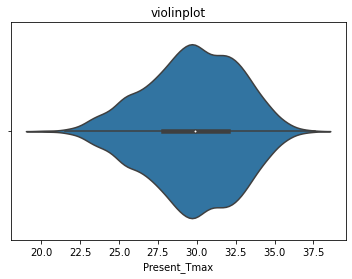

In [10]:
sns.violinplot(x='Present_Tmax',data=tp)
plt.title('violinplot')
plt.show()

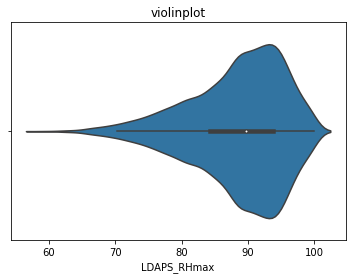

In [11]:
sns.violinplot(x='LDAPS_RHmax',data=tp)
plt.title('violinplot')
plt.show()

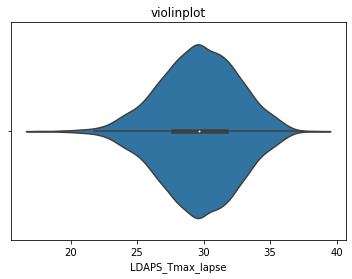

In [12]:
sns.violinplot(x='LDAPS_Tmax_lapse',data=tp)
plt.title('violinplot')
plt.show()

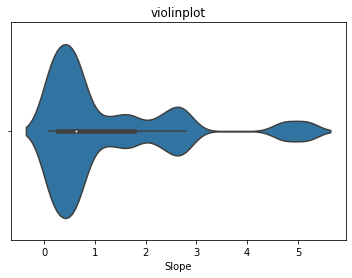

In [13]:
sns.violinplot(x='Slope',data=tp)
plt.title('violinplot')
plt.show()

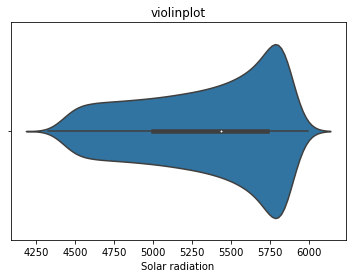

In [14]:
sns.violinplot(x='Solar radiation',data=tp)
plt.title('violinplot')
plt.show()

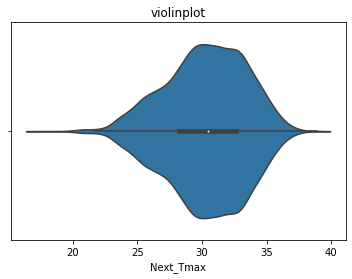

In [15]:
sns.violinplot(x='Next_Tmax',data=tp)
plt.title('violinplot')
plt.show()

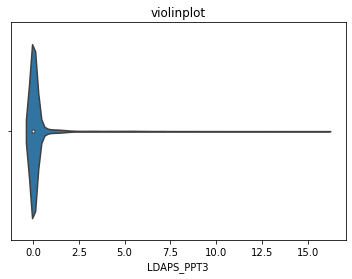

In [16]:
sns.violinplot(x='LDAPS_PPT3',data=tp)
plt.title('violinplot')
plt.show()

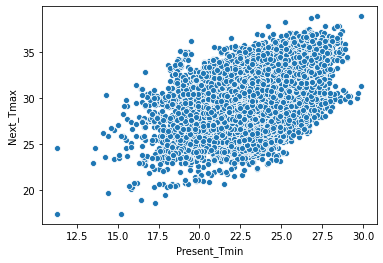

In [17]:
sns.scatterplot(x='Present_Tmin',y='Next_Tmax',data=tp)

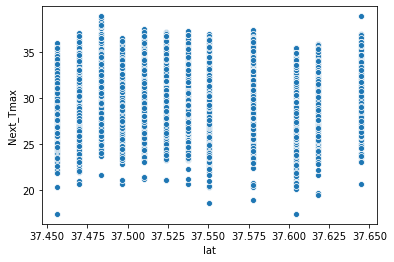

In [18]:
sns.scatterplot(x='lat',y='Next_Tmax',data=tp)

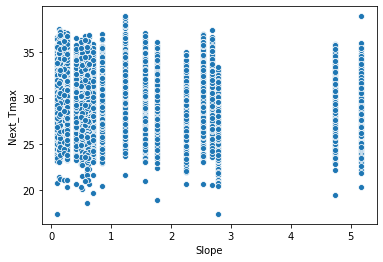

In [19]:
sns.scatterplot(x='Slope',y='Next_Tmax',data=tp)

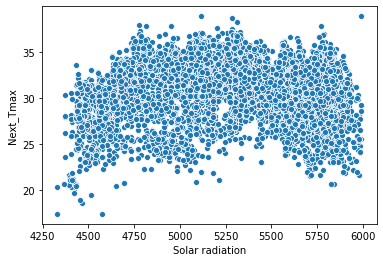

In [20]:
sns.scatterplot(x='Solar radiation',y='Next_Tmax',data=tp)

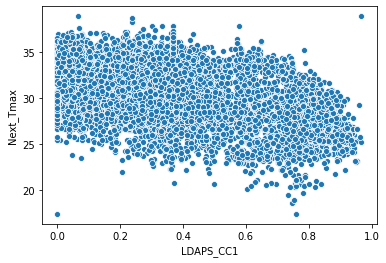

In [21]:
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=tp)

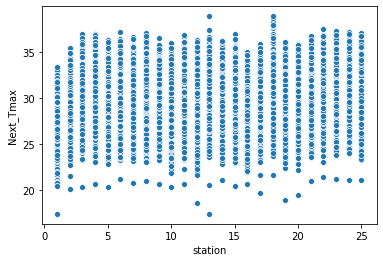

In [22]:
sns.scatterplot(x='station',y='Next_Tmax',data=tp)

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
tp['Date']=enc.fit_transform(tp['Date'].values.reshape(-1,1))

In [24]:
tp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,290.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,290.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,290.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,290.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))
sns.heatmap(tp.describe().T,annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

NameError: name 'sns' is not defined

<Figure size 1584x576 with 0 Axes>

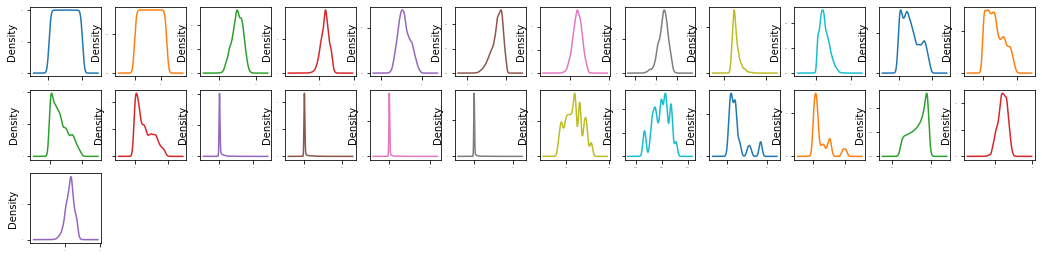

In [26]:
tp.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

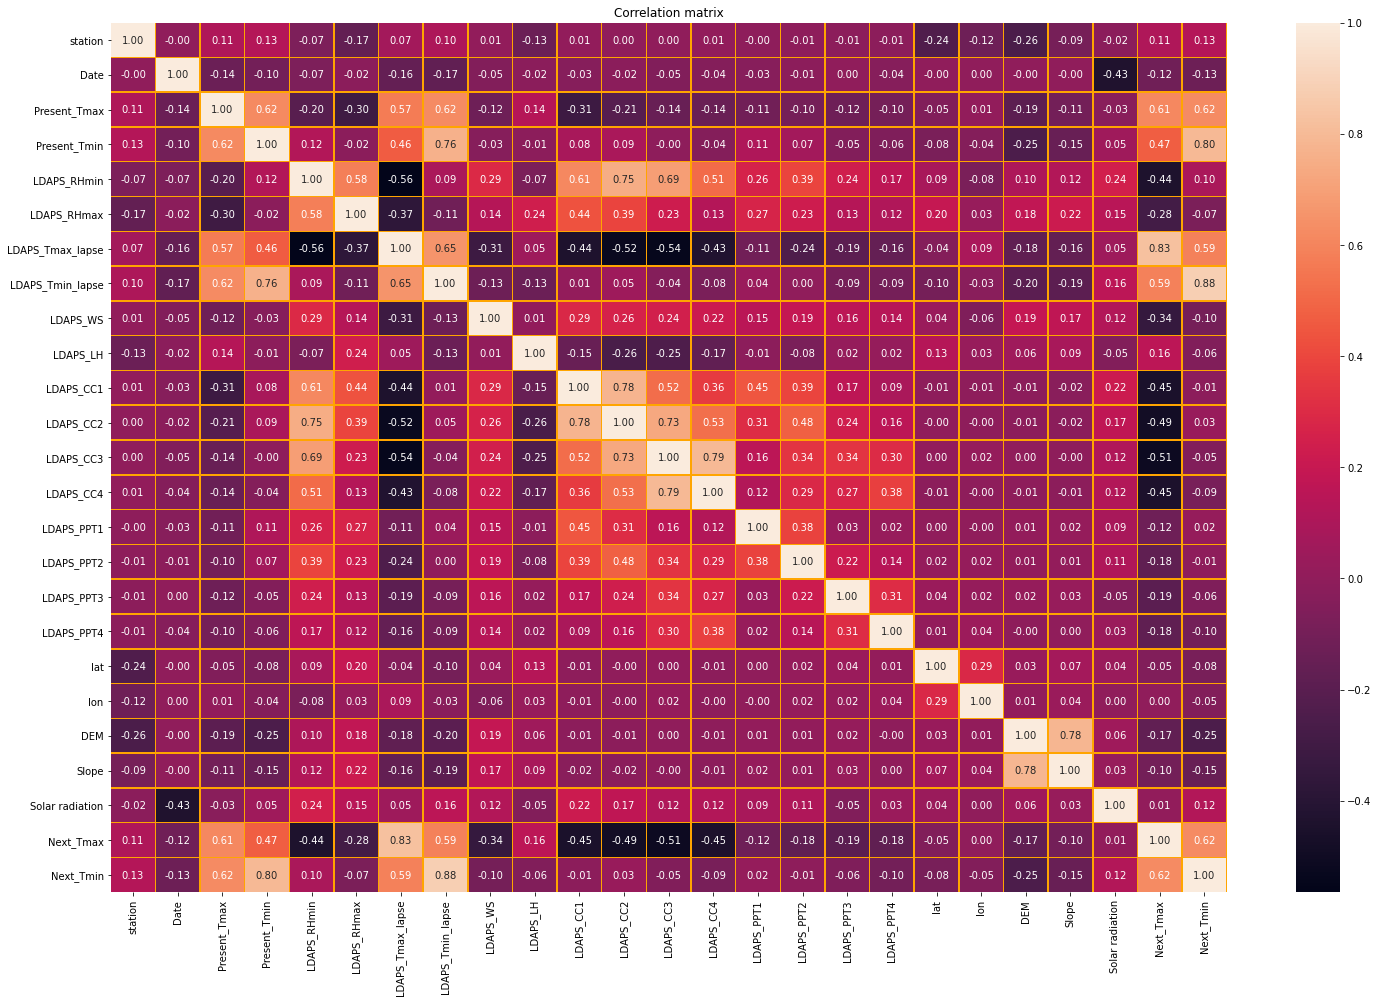

In [27]:
corr=tp.corr()                                               # multivariate analysis
plt.figure(figsize=(25,16))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

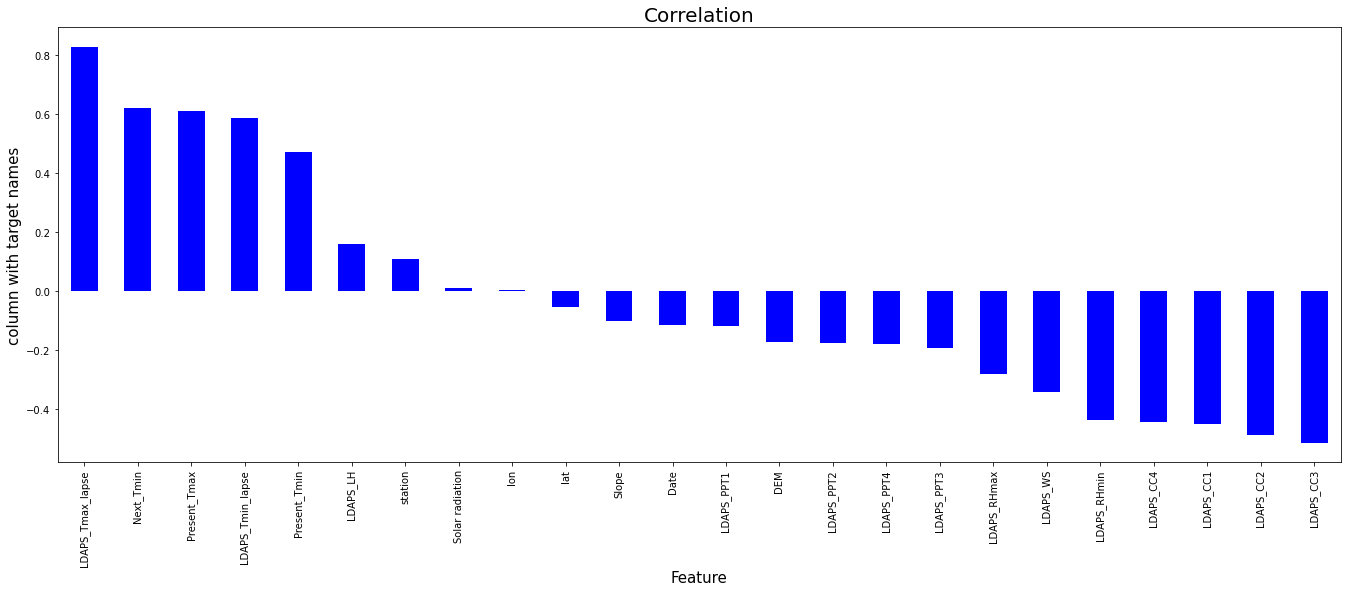

In [28]:
plt.figure(figsize=(23,8))
tp.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

In [29]:
tp.skew()

station             0.000000
Date                0.000009
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

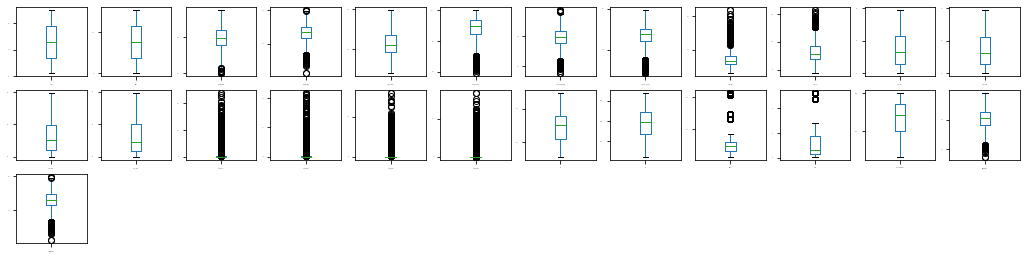

In [31]:
tp.plot(kind='box',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

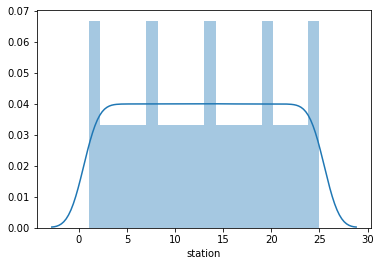

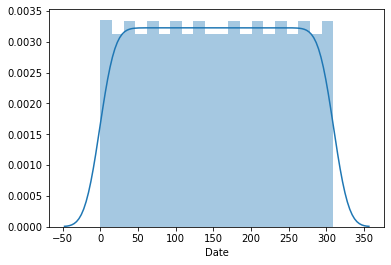

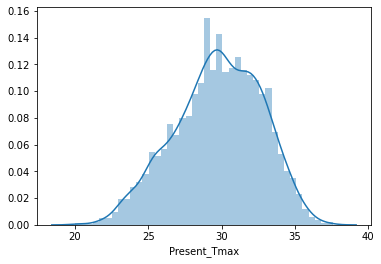

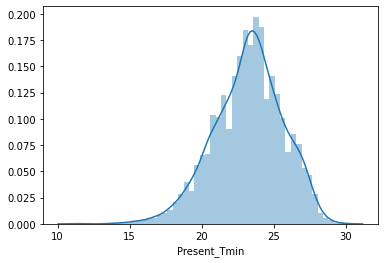

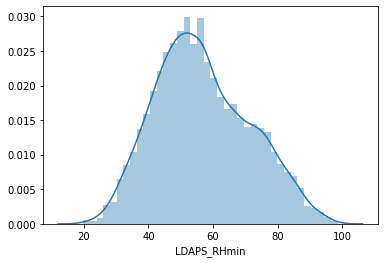

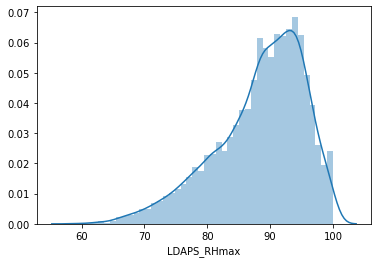

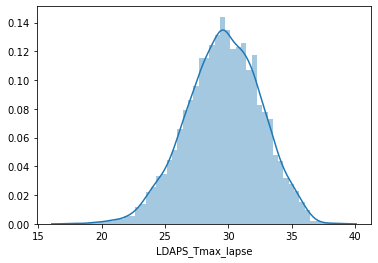

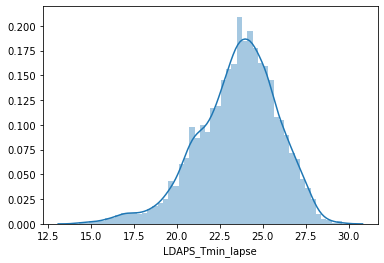

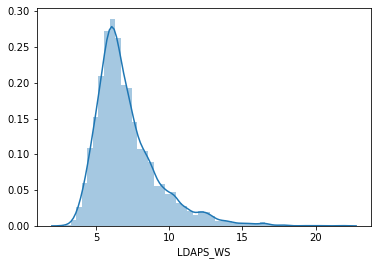

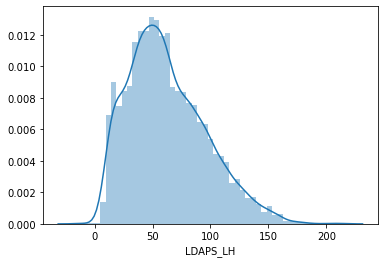

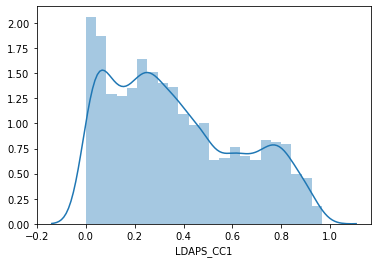

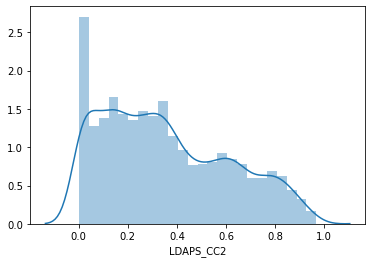

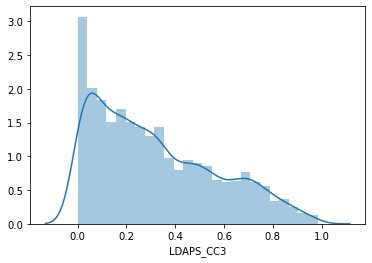

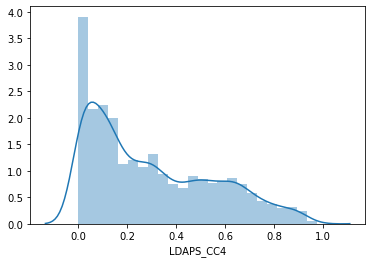

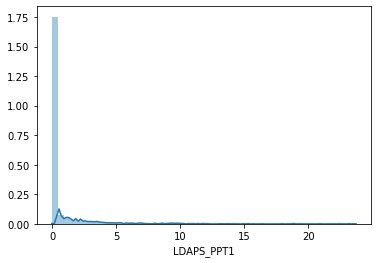

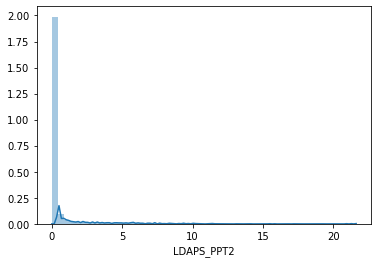

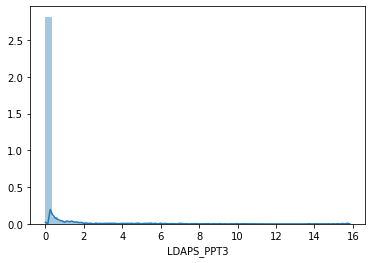

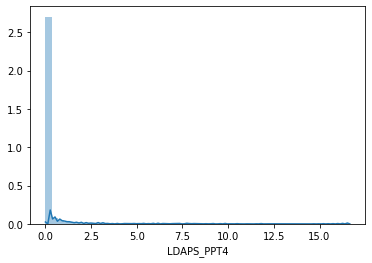

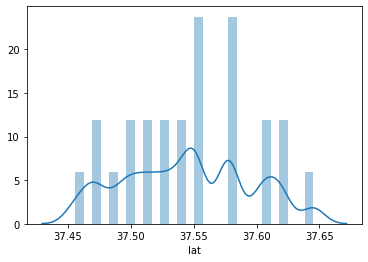

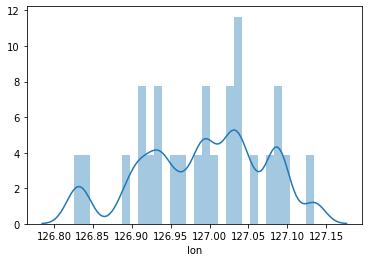

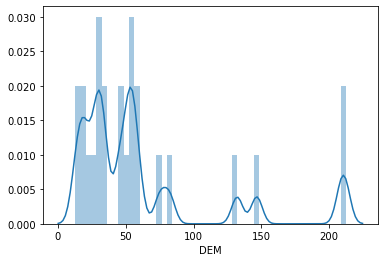

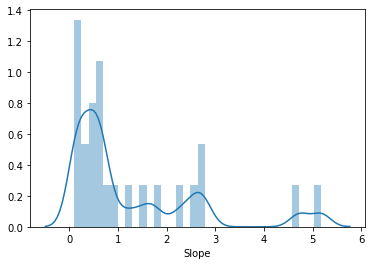

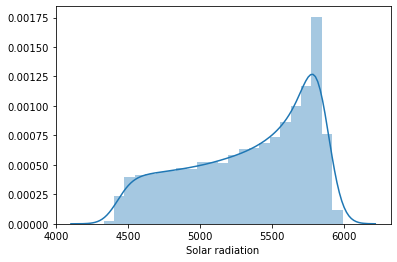

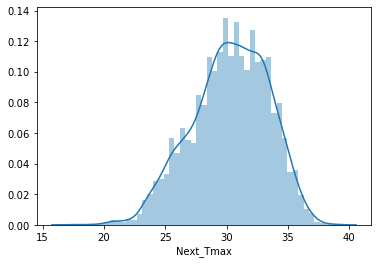

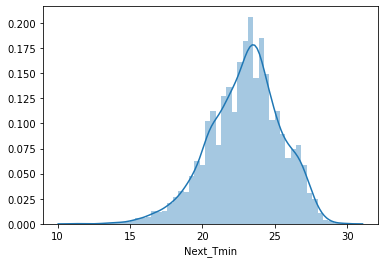

In [34]:
for j in tp.columns:
    plt.figure()
    sns.distplot(tp[j])

In [35]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(tp))
z.shape

(7752, 25)

In [36]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 8, 15, 15, ..., 15, 16, 17], dtype=int64))


In [37]:
tp_new=tp[(z<3).all(axis=1)]
print(tp.shape)
print(tp_new.shape)

(7752, 25)
(6894, 25)


In [38]:
loss=((7752-6894)/7752)*100
loss

11.06811145510836

In [39]:
x=tp.drop(['Next_Tmax'],axis=1)
y=tp['Next_Tmax']

In [40]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [41]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [42]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    pred=ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.7851845767576622 on Random_state  1
Best Accuracy is  0.7851845767576622 on Random_state  1
Best Accuracy is  0.7897116491498821 on Random_state  3
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_state  4
Best Accuracy is  0.7997300946890987 on Random_s

Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy is  0.8026580286265533 on Random_state  124
Best Accuracy 

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=200)
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('predicted price',pred)
print('actual price',y_test)
print('Error :-')
print('mean absolute error :-',mean_absolute_error(y_test,pred))
print('mean squared error :-',mean_squared_error(y_test,pred))
print('root mean squared error :-',np.sqrt(mean_squared_error(y_test,pred)))
from sklearn.metrics import r2_score
print('r2_score value :-',r2_score(y_test,pred))

predicted price [28.86234272 24.99549711 26.30814999 ... 32.76542234 30.94622262
 31.37872244]
actual price 7564    28.7
7370    26.9
338     25.8
1673    29.8
842     34.0
        ... 
3773    29.9
3147    29.6
6801    34.1
6636    31.0
7507    32.1
Name: Next_Tmax, Length: 2326, dtype: float64
Error :-
mean absolute error :- 1.067412769391392
mean squared error :- 1.899652679327598
root mean squared error :- 1.378278883001404
r2_score value :- 0.8043886443984001


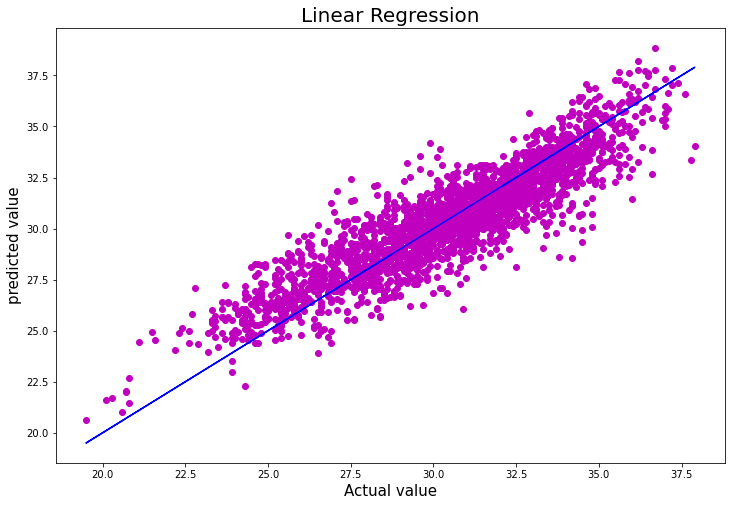

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=pred,color='m')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title("Linear Regression",fontsize=20)
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [46]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(1,20))}
en=ElasticNet()
gsp=GridSearchCV(en,parameters)
gsp.fit(x_train,y_train)
print(gsp.best_params_)

{'alpha': 0.0001, 'random_state': 1}


In [47]:
en=ElasticNet(alpha=0.0001,random_state=1)
en.fit(x_train,y_train)
preden=en.predict(x_test)
r2=r2_score(y_test,preden)
print(r2)

0.8044240956129765


In [48]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2=r2_score(y_test,predrf)
print(r2)

0.9144592068773018


In [49]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2=r2_score(y_test,predad)
print(r2)

0.7515660209998175


In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mae')
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2=r2_score(y_test,preddtr)
print(r2)

0.7796284402307312


In [51]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ln,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.7179936949773047


In [52]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(en,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.7182022194264622


In [53]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(rf,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.6971200429636598


In [54]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ad,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.6548644229010562


In [55]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dtr,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.4192715863184942


minimum difference is r2score and cross validation score is for ElasticNet() so this is our best model.

In [56]:
en=ElasticNet(alpha=0.0001,random_state=1)
en.fit(x_train,y_train)
preden=en.predict(x_test)
r2=r2_score(y_test,preden)
print(r2)

0.8044240956129765


In [57]:
import joblib
joblib.dump(en,'temperaturemodel.obj')

['temperaturemodel.obj']